<p style="text-align: center;font-size: 40pt">Rotation in 3D - axis-angle</p>

In [1]:
%matplotlib widget
#%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Rotation matrix](2-lesson_rotation_mat.ipynb)

Objectives of this lesson:

- Introduce Euler's Theorem
- Present the Rodrigues' rotation formula and its derivation
- Give pros and cons for using axis-angle representation


Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
----

# Parameters

You can find two similar notations for axis-angle rotation parameters.
The first version is more explicit and defines $\matsym{\theta}$ as a set holding an axis of rotation $\vec{e}$ and an angle of rotation $\theta$, as in

\begin{aligned}
\matsym{\theta} = \{\mat{e}, \theta\}
\textdot
\end{aligned}


The second version defines $\matsym{\theta} \in \real^{3}$, such that

\begin{aligned}
\matsym{\theta} = \theta \mat{e}
\textcomma
\end{aligned}

so the magnitude of $\matsym{\theta}$ is the rotation angle.
Both of these notations give exactly the same result.

## Euler's Theorem

In 1775, [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler), proved that
> In three-dimensional space, any displacement of a rigid body such that a point on the rigid body remains fixed, is equivalent to a single rotation about some axis that runs through the fixed point. 

The vector in question is $\vec{e}$ in our notation and it has a unit length.
This vector is thus known as the Euler vector.
To know in which direction points will move with a positive angle $\theta$, you align your thumb with the axis $\vec{e}$ and you fingers will point in the positive angle direction.
Of course, you need to use your right hand.

Using the following figure, you can try to anticipate in which direction the yellow points will move.
For that:
1. rotate the camera to understand the scene
1. predict in which direction the yellow points will rotate
1. play with the slider to see what happens
1. change the value of `e` in the code to test another axis

In [2]:
%matplotlib widget
if 'fig' in globals():
    plt.close(fig)
    
fig = plt.figure(figsize=(4,4))

P = np.array([[-0.9, -1.1, -0.8],
              [-1.1, -1.2, -1.2],
              [1.1, 0.6, 0.8]])

# rotation axis (make some change here)
e = np.array([-1, -1, 1])

# ensure that the vector e is normalized
e = e/np.linalg.norm(e)

axis_ang = Axis_angle(e)

#------------------------
# plot 
ax1 = fig.add_subplot(111, projection="3d")
ax = ax1
ax.set_title(r"Axis-angle representation")

# computation to draw the angle
radius = 1.0
anchor_axis = np.array([e[0]+radius, e[1], e[2]])
anchor_axis = anchor_axis/np.linalg.norm(anchor_axis)

if np.dot(anchor_axis, e) > 0.98:
    anchor_axis = np.array([e[0], e[1]+radius, e[2]])
    anchor_axis = anchor_axis/np.linalg.norm(anchor_axis)
    
anchor_axis = np.cross(np.cross(e, anchor_axis), e)
anchor_axis = anchor_axis/np.linalg.norm(anchor_axis)

anchor_theta = e+(radius*anchor_axis)

ax.scatter(anchor_theta[0],anchor_theta[1],anchor_theta[2], color="tab:red", depthshade=False)
text_handle = Annotation3D(r"$\theta$", anchor_theta, text_offset=[0,0,0.1],
                               size=12, color="tab:red")
ax.add_artist(text_handle)

# draw rotation axis
draw_3d_vector(ax, e, text=r"$\vec{e}$", text_offset=[0,0,0.1], color="tab:blue")

# prepare handles
scat_z = ax.scatter([],[],[], color="yellow", depthshade=False)
arc = ax.plot([], [], [], color="tab:red")
rot_axis = draw_3d_vector(ax, text=r"$\vec{\theta}$", text_offset=[0,0,-0.4], color="tab:green", size=12)

# graph decoration
draw_3d_frame(ax, size=10)
ax.set_axis_off()
ax_lim = 1.
ax.set_xlim(-ax_lim, ax_lim); ax.set_ylim(-ax_lim, ax_lim); ax.set_zlim(-ax_lim, ax_lim)
    
def update(theta=0.):
    P_prime = np.empty_like(P)
        
    for i,v in enumerate(P.T):
        P_prime[:,i] = axis_ang.rotate_point(v, theta)
    scat_z._offsets3d = P_prime
    
    rot_axis[0].set_positions(theta*e)
    rot_axis[1].set_position(theta*e)
    
    A = interpolate_rot(anchor_theta, 0., theta, 0.1, axis_ang.to_mat)
    arc[0].set_xdata(A[0,:])
    arc[0].set_ydata(A[1,:])
    arc[0].set_3d_properties(zs=A[2,:])        
            
    fig.canvas.draw() # needed!

widgets.interact(update, theta = (-2.*np.pi, 2.*np.pi, 0.1), continuous_update=False);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, min=-6.28318530717958…

# Operations

## Inverse rotation

With the notation using a set $\{\mat{e}, \theta \}$, you can simply flip the sign of the axis or the angle.
So, if we state that

\begin{aligned}
\R{} = \mathrm{rot}(\mat{e}, \theta )
\textcomma
\end{aligned}

then, the inverse rotation is
\begin{aligned}
\R{}^{-1} 
&= \mathrm{rot}(-\mat{e}, \theta )
\\
&= \mathrm{rot}(\mat{e}, -\theta )
\textdot
\end{aligned}


With the notation directly using $\matsym{\theta} \in \real^{3}$, the inverse rotation is directly

\begin{aligned}
\R{}^{-1} 
&= \mathrm{rot}(-\matsym{\theta} )
\textdot
\end{aligned}

## Rotate a point
If you have access to the coordinates of an axis of rotation $\mat{e}$ and an angle of rotation $\theta$, you can directly rotate a point $\point{p}$ using

\begin{aligned}
\point{p}' &= \mathrm{rot}(\point{p}, \matsym{\theta})
\\
&= \mathrm{rot}(\point{p}, \mat{e}, \theta)
\\
&= (\cos \theta) \point{p} + (\sin \theta) (\mat{e} \times \point{p})  +
                (1 - \cos \theta ) \mat{e}^{} \mat{e}^T  \point{p}
\textdot
\end{aligned}

The equation is known as _Rodrigues' rotation formula_.
It is not straightforward to understand, but you can do a sanity check by computing what happens if you set $\theta = 0$.
Go ahead, you can do it in your head...

The derivation of this equation fits on a single sheet of paper, but requires a step-by-step explanation beyond my animation skills in Python.
A video will be better suited for this:

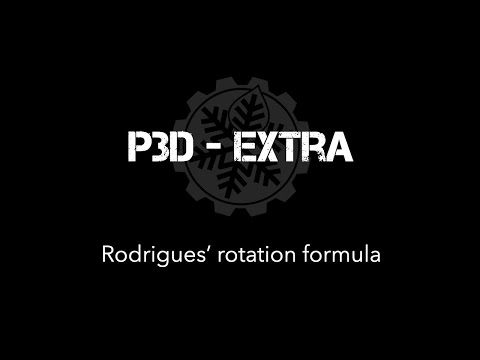

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('RtjM1xzpB58', width=720, height=480)

# Conversion to rotation matrix

We can define the rotation matrix using the equation to rotate a point, such that

\begin{aligned}
\R{} \point{p} &= \point{p}'
\\
&= (\cos \theta) \point{p} + (\sin \theta) (\mat{e} \times \point{p})  +
                (1 - \cos \theta ) \mat{e}^{} \mat{e}^T  \point{p}
\\
&= (\cos \theta) \mat{I} \point{p} + (\sin \theta) {[\mat{e}]}_{\times} \point{p}  +
                (1 - \cos \theta ) \mat{e}^{} \mat{e}^T  \point{p}
\\
&=  \underbrace{ \left[(\cos \theta) \mat{I} + (\sin \theta) {[\mat{e}]}_{\times} +
                (1 - \cos \theta ) \mat{e}^{} \mat{e}^T \right] }_{\R{}}  \point{p}
\textdot
\end{aligned}

Then, we can simply state that

\begin{aligned}
\R{} = (\cos \theta) \mat{I} + (\sin \theta) {[\mat{e}]}_{\times} + (1 - \cos \theta) \mat{e}^{} \mat{e}^T
\textcomma
\end{aligned}

where ${[\mat{e}]}_{\times}$ is a skew-symmetric matrix and $\mat{e}^{} \mat{e}^T$ is a symmetric matrix.
At this point, you should know what they look like, but just in case, here they are

\begin{aligned}
{[\mat{e}]}_{\times} = 
\bmat{
0 & -e_\azi & e_\ayi \\ 
e_\azi & 0 & -e_\axi \\ 
-e_\ayi & e_\axi & 0 }
, \quad
\mat{e}^{} \mat{e}^T =
\bmat{
e^2_\axi & e_\axi e_\ayi & e_\axi e_\azi \\ 
e_\axi e_\ayi & e^2_\ayi & e_\ayi e_\azi\\ 
e_\axi e_\azi & e_\ayi e_\azi & e^2_\azi }
\textdot
\end{aligned}

# Conversion ambiguity and singularity

Although it is true that all 3D rotations can be expressed using the axis-angle representation, the mapping is not one-to-one.
Two combinations of an axis and an angle can lead to the same rotation.
To experience this ambiguity yourself, use the following figure to:
1. rotate the scene to understand it
1. use the slider `theta_1` to rotate the yellow dot to the red `x`.
1. use the slider `theta_2` to rotate the yellow dot to the red `x`.

What happens to the angle?

In [2]:
%matplotlib widget
if 'fig' in globals():
    plt.close(fig)
    
fig = plt.figure(figsize=(8,4))

p = np.array([-0.3, -0.6, 0.5])
target = np.array([0.3,  0.15, 0.77])

# rotation axis 
e1 = np.array([-0.192, -0.192,  0.9625])
axis_ang1 = Axis_angle(e1)
e2 = -e1
axis_ang2 = Axis_angle(e2)

#------------------------
# plot version 1
ax1 = fig.add_subplot(121, projection="3d")
ax = ax1; ax.set_title(r"Version 1")

# draw rotation axis
draw_3d_vector(ax, e1, text=r"$\vec{e}_1$", text_offset=[-0.1,-0.1,0.1], color="tab:blue", size=15)
ax.scatter(target[0], target[1], target[2], color="tab:red", marker='x', s=40)

# prepare handles
scat_z1 = ax.scatter([],[],[], color="yellow", depthshade=False)

#------------------------
# plot version 2
ax2 = fig.add_subplot(122, projection="3d")
ax = ax2; ax.set_title(r"Version 2")

# draw rotation axis
draw_3d_vector(ax, e2, text=r"$\vec{e}_2$", text_offset=[0,0,-0.1], color="tab:blue", size=15)
ax.scatter(target[0], target[1], target[2], color="tab:red", marker='x', s=40)

# prepare handles
scat_z2 = ax.scatter([],[],[], color="yellow", depthshade=False)

# graph decoration
for ax in [ax1, ax2]:
    draw_3d_frame(ax, size=10)
    ax.set_axis_off()
    ax_lim = 1.
    ax.set_xlim(-ax_lim, ax_lim); ax.set_ylim(-ax_lim, ax_lim); ax.set_zlim(-ax_lim, ax_lim)
    
def update(theta_1=0., theta_2=0.):
    
    scat_z1._offsets3d = axis_ang1.rotate_point(p, theta_1)
    scat_z2._offsets3d = axis_ang2.rotate_point(p, theta_2)
          
    fig.canvas.draw() # needed!

widgets.interact(update, theta_1 = (-np.pi, np.pi, 0.01), theta_2 = (-np.pi, np.pi, 0.01), continuous_update=False);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='theta_1', max=3.141592653589793, min=-3.141592653589…

Singularities can happen at $\theta = 0$ and $\theta = \pi$.
The first singularity is only apparent when using the notation $\{\mat{e}, \theta \}$ because any axis will satisfy a rotation with $\theta = 0$.
Therefore, when a rotation matrix is identity, we have

\begin{aligned}
\R{} = \mat{I} = \mathrm{rot}(\mathrm{undefined}, \theta )
\textdot
\end{aligned}

This situation can be avoided using $\matsym{\theta} \in \real^{3}$ instead, leading to well-behaved parameters

\begin{aligned}
\R{} = \mat{I} = \mathrm{rot}(\;\bmat{0\\0\\0} \;)
\textdot
\end{aligned}

Unfortunately, the second singularity at $\theta = \pi$ cannot be avoided.
Go back to the last figure and push both sliders to $\pi$.
You will finish with two different rotation vectors with the same value of $\theta$ and representing the exact same rotation.
This singularity causes problem when we try to convert a rotation matrix $\R{}$ to axis-angle parameters.
Given that

\begin{aligned}
\R{} = \bmat{
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33} \\
}
\textcomma
\end{aligned}

The absolute value of the angle $\theta$ can be found with

\begin{aligned}
| \theta | = \arccos \left( \frac{\mathrm{tr}({\R{}}) - 1}{2} \right)
\textcomma
\end{aligned}

where the function $\mathrm{tr}(\cdot)$ is the trace of a matrix and can be computed by summing the diagonal elements of a matrix such that 

\begin{aligned}
\mathrm{tr}({\R{}}) = r_{11} + r_{22} + r_{33}
\textdot
\end{aligned}

So far, so good.
The problem arises when we compute the axis $\mat{e}$.
The axis can be recovered using

\begin{aligned}
\mat{a} &= \bmat{
(r_{32}-r_{23}) \\
(r_{13}-r_{31}) \\
(r_{21}-r_{12})
}
\\
\\
\mat{e} &= \frac{\mat{a}}{2 \sin \theta }
\textdot
\end{aligned}

With either $\sin(0)=0$ or $\sin(\pi)=0$, the division will lead to an undefined rotation axis.


# Pros and cons

- Easy to understand.

- Easy to anticipate what rotation will be produced by using your right hand with the thumb in the direction of the axis $\mat{e}$. 

- Smooth interpolation when the axis of rotation is constant and the angle varies.

- Singularity when $\theta = \pi$.

- A single point can be rotated without any conversion to a rotation matrix. 

- Easy to inverse a rotation.

- Not efficient for rotating a complete point cloud. 



# Conclusion

You should do the following activities to enhance your understanding of the concepts viewed in this lesson:
- play with the Python scripts provided;
- do the [exercises](../../exercises/transformations_3d/3e-exercises_axis_angle.ipynb) related to this lesson, they are necessary to connect concepts;
- modify the markdown by adding your own notes using `> my notes`; and
- complete the tables [Symbol definitions](#Symbol-definitions) and [Glossary](#Glossary) and add your own definitions.

Next lesson:
- [Quaternion](4-lesson_rotation_quaternion.ipynb)

## Symbol definitions

| Symbol                      | Definition            |
|--------------------         |-------------          |
| $|a|$                       | Absolute value of $a$ |
| $\mat{a} \times \mat{b}$    | Cross product between $\mat{a}$ and $\mat{b}$ |
| $[\mat{a}]_\times$          | Skew symmetric matrix from $\mat{a}$ |
| $\mat{e}$                   | Axis of rotation      |
| $\theta$                    | Angle of rotation     |
| $\matsym{\theta}$           | Combination of axis and angle     |
| $\mathrm{tr}(\mat{A})$      | Trace of the matrix $\mat{A}$ (i.e., sum of diagonal elements)  |
| ...                         |                       |

## Glossary

| English               | Français                | Definition |
|-----------            |------------             |------------|
| axis-angle representation | représentation axe-angle
| ...                   |                         |            |